<a href="https://colab.research.google.com/github/luisalfonso634/C2-G13-m/blob/main/4TA_ENTREGA25feb23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# PRONOSTICAR LA OCURRENCIA DE PRECIPITACION EN BASE A LOS VALORES DE OTROS PARAMETROS METEOROLOGICOS


**Introduccion**

La investigacion propuesta puede ser relevante para varios sectores económicos que dependen del clima o están relacionados con él. Tales como:
Sector Agricola: Los agricultores pueden utilizar los datos de precipitación, temperatura, presión en superficie y humedad relativa para planificar las siembras, el riego y el uso de pesticidas.

Sector Energía: Las empresas de energía, especialmente las que producen energía hidroeléctrica, pueden utilizar los datos meteorológicos para planificar la generación de energía y prevenir riesgos de inundaciones.

Sector Transporte: Las empresas de transporte, como las aerolíneas y las empresas de transporte marítimo, pueden utilizar los datos meteorológicos para planificar sus operaciones y prever posibles retrasos o cancelaciones debido a las condiciones climáticas.

Sector Turismo: Las empresas de turismo, como las compañías de aereas, los operadores de actividades al aire libre y los hoteles, pueden utilizar los datos meteorológicos para planificar sus operaciones y ofrecer experiencias atractivas a los clientes.

En resumen, este trabajo puede ser relevante para cualquier sector que dependa del clima o que esté relacionado con él, ya que la capacidad de pronosticar la precipitación con datos meteorológicos precisos puede tener un impacto significativo en la toma de decisiones empresariales.

**HIPOTESIS**

Existe una relación entre la cantidad de precipitación en las últimas 24 horas y la temperatura, la presión en superficie y la humedad relativa a 2 metros de altura. A medida que aumentan la humedad relativa y la presión en superficie, y disminuye la temperatura, aumenta la probabilidad de que ocurra precipitación en las próximas horas.


**METODOLOGIA PROPUESTA**

Para poner a prueba esta hipótesis, se realizará un análisis de regresión para determinar la influencia que tiene cada una de estas variables en la cantidad de precipitación en las próximas horas. 
Además, se podran utilizar técnicas de modelado predictivo para desarrollar un modelo que permita predecir la probabilidad de precipitación en función de las variables mencionadas.

**Problema Comercial:** Crear un modelo para predecir la precipitacion en base a otros parametros meteorológicos

**Contexto analítico:** Como parte de una empresa consultora, los siguientes datos se han recopilado y están disponibles en el drive:

El archivo ***"Weather_DATASET_2_Buenos_Aires_2008_2022.xlsx"***.  
Esta una Base de Datos compartida por METEOMATICS, con 54810 filas y 14 parametros distintos (columnas)
 (https://www.meteomatics.com/en/weather-api/?ppc_keyword=meteomatics&gclid=Cj0KCQiAn4SeBhCwARIsANeF9DLv5OV9Bz-p5NOgLt6hKZiss9g7CdySQ_hlHBY8OFuxCyXPrJQebpYaAiUOEALw_wcB), con informacion de varios parametros meteorologicos en un periodo de tiempo que va desde el 01ENE2008 al 01ENE2023.

Es una base de datos que contiene información climática recopilada de diversas estaciones meteorológicas. La base de datos cuenta con 17 columnas que incluyen información como la ubicación de la estación meteorológica (latitud y longitud), el nombre de la estación, la fecha y hora de las mediciones, así como diversos datos climáticos como la cantidad de precipitación en las últimas 24 horas, temperatura, dirección y velocidad del viento, humedad relativa, presión en superficie, espesor de la capa entre 500 y 1000 hPa, entre otros.

La información de la base de datos puede ser utilizada para realizar análisis climáticos y pronósticos meteorológicos en diferentes sectores económicos como la agricultura, la aviación, la energía, entre otros, que requieren conocer la variabilidad del clima y sus impactos. También puede ser utilizada para la investigación científica en el campo de la climatología y la meteorología o cualquiera de los campos que se indicaron anteriormente.

In [9]:
! pip install -q chart_studio
! pip install -q bqplot
! pip install -q pingouin
!pip install pyreadstat
import pyreadstat
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from   scipy import stats
from matplotlib.patches import Rectangle
import seaborn as sns
from google.colab import files
from google.colab import drive
from datetime import datetime, timedelta
from pandas import DataFrame
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import pyreadstat
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Wheather Data Set 2/Weather_DATASET_2_Buenos_Aires_2008_2022.xlsx')
dfweather2=df

#Para separar una columna con fecha y hora en dos columnas diferentes
dfweather2['Date'] = pd.to_datetime(dfweather2['valid date']).dt.date

#Pase Date a type datetime
dfweather2['Date'] = pd.to_datetime(dfweather2['Date'])
dfweather2['Month'] = pd.to_datetime( dfweather2['Date'] , format='%YYY%MM%DD')

#Para extraer el mes de la fecha y guardarlo en un campo aparte
df['Month2'] = dfweather2['Month'].dt.month 

dfweather3=dfweather2[['Month2','precip_24h:mm','t_2m:C','t_500hPa:C','relative_humidity_2m:p',	'sfc_pressure:hPa',	'layer_thickness_500hPa_1000hPa:m','wind_dir_10m:d',	'wind_speed_11m:ms',	'wind_dir_500hPa:d',	'wind_speed_500hPa:ms']]
dfweather3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Month2,precip_24h:mm,t_2m:C,t_500hPa:C,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms
0,1,0.00,26.8,-10.7,80.1,1008,5735.7,101.7,3.1,252.0,12.3
1,1,0.00,25.8,-10.7,79.5,1010,5729.9,46.0,4.7,226.4,10.2
2,1,0.00,26.5,-9.0,74.7,1008,5723.6,215.8,3.2,317.2,14.2
3,1,0.07,26.6,-10.7,68.4,1014,5699.5,156.4,10.1,237.7,17.9
4,1,0.00,20.0,-12.0,68.3,1020,5658.2,115.4,9.2,217.5,14.6
...,...,...,...,...,...,...,...,...,...,...,...
54805,12,0.30,24.6,-13.8,54.8,1009,5646.5,357.8,3.1,186.3,6.7
54806,12,2.82,22.6,-13.8,71.0,1013,5599.8,104.2,7.5,220.3,18.8
54807,12,0.00,25.8,-9.2,52.3,1010,5714.5,52.6,4.3,252.4,13.2
54808,12,0.00,28.8,-11.0,44.5,1006,5754.9,318.2,3.3,245.7,6.8


La Base de datos luego de excluir algunas variables que se consideraron menos importantes, quedó compuesta por 11 variables que miden diferentes aspectos climáticos. 

Estas variables son:

**Month2**: Mes en el que se tomó la medición.

**precip_24h:mm:** Cantidad de precipitación en milímetros en las últimas 24 horas.

**t_2m:C:** Temperatura del aire a una altura de 2 metros en grados Celsius.

**t_500hPa:C:** Temperatura del aire en la altura de 500 hectopascales en grados Celsius.

**relative_humidity_2m:p:** Humedad relativa a una altura de 2 metros en porcentaje
sfc_pressure:hPa: Presión de superficie en hectopascales.

**layer_thickness_500hPa_1000hPa:m:** Espesor de la capa de aire entre 500 y 1000 hectopascales en metros.

**wind_dir_10m:d:** Dirección del viento a una altura de 10 metros en grados.

**wind_speed_11m:ms:** Velocidad del viento a una altura de 11 metros en metros por segundo.

**wind_dir_500hPa:d:** Dirección del viento en la altura de 500 hectopascales en grados.

**wind_speed_500hPa:ms:** Velocidad del viento en la altura de 500 hectopascales en metros por segundo.

In [10]:
dfweather3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Month2                            54810 non-null  int64  
 1   precip_24h:mm                     54810 non-null  float64
 2   t_2m:C                            54810 non-null  float64
 3   t_500hPa:C                        54810 non-null  float64
 4   relative_humidity_2m:p            54810 non-null  float64
 5   sfc_pressure:hPa                  54810 non-null  int64  
 6   layer_thickness_500hPa_1000hPa:m  54810 non-null  float64
 7   wind_dir_10m:d                    54810 non-null  float64
 8   wind_speed_11m:ms                 54810 non-null  float64
 9   wind_dir_500hPa:d                 54810 non-null  float64
 10  wind_speed_500hPa:ms              54810 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 4.6 MB


**Problema** Como parte del estudio realizado para el Curso de Data Science, se propone estudiar los parametros meteorológicos expresado en el cuadro anterior a fin de revisar si es posible pronosticar la ocurrencia de precipitación de acuerdo a otros parámetros meteorológicos

La pregunta final viene quedando asi: 

**¿Es posible pronosticar eventos de precipitacion de acuerdo con el aumento o disminución de otros parametros meteorologicos?**

##EXPLORACION DE DATA

In [11]:
dfweather3.head()

,Month2,precip_24h:mm,t_2m:C,t_500hPa:C,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms
0,1,0.00,26.8,-10.7,80.1,1008,5735.7,101.7,3.1,252.0,12.3
1,1,0.00,25.8,-10.7,79.5,1010,5729.9,46.0,4.7,226.4,10.2
2,1,0.00,26.5,-9.0,74.7,1008,5723.6,215.8,3.2,317.2,14.2
3,1,0.07,26.6,-10.7,68.4,1014,5699.5,156.4,10.1,237.7,17.9
4,1,0.00,20.0,-12.0,68.3,1020,5658.2,115.4,9.2,217.5,14.6


In [12]:
#Para saber que columnas tengo en el DATASET
df.columns

Index(['lat', 'lon', 'Nombre_Estacio', 'valid date', 'precip_24h:mm', 't_2m:C',
       't_500hPa:C', 'wind_dir_10m:d', 'wind_speed_11m:ms',
       'wind_dir_500hPa:d', 'wind_speed_500hPa:ms', 'relative_humidity_2m:p',
       'sfc_pressure:hPa', 'layer_thickness_500hPa_1000hPa:m', 'Date', 'Month',
       'Month2'],
      dtype='object')

In [13]:
dfweather3.corr()

,Month2,precip_24h:mm,t_2m:C,t_500hPa:C,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms
Month2,1.000000,-0.008822,-0.231567,-0.283930,-0.032638,0.060478,-0.240154,-0.016567,0.055256,0.080984,0.167048
precip_24h:mm,-0.008822,1.000000,0.027696,0.086625,0.179858,-0.171514,0.057915,0.092866,0.102492,0.089425,0.152500
t_2m:C,-0.231567,0.027696,1.000000,0.760097,-0.119449,-0.554483,0.851113,-0.184937,0.033531,-0.051478,-0.334537
t_500hPa:C,-0.283930,0.086625,0.760097,1.000000,0.074692,-0.443054,0.927975,-0.262745,0.020969,-0.028373,-0.276909
relative_humidity_2m:p,-0.032638,0.179858,-0.119449,0.074692,1.000000,-0.062973,0.119955,-0.103944,-0.020704,0.148573,-0.060714
sfc_pressure:hPa,0.060478,-0.171514,-0.554483,-0.443054,-0.062973,1.000000,-0.580130,-0.029817,0.114742,-0.166141,-0.062204
layer_thickness_500hPa_1000hPa:m,-0.240154,0.057915,0.851113,0.927975,0.119955,-0.580130,1.000000,-0.277859,-0.025624,0.030063,-0.330819
wind_dir_10m:d,-0.016567,0.092866,-0.184937,-0.262745,-0.103944,-0.029817,-0.277859,1.000000,-0.019531,-0.027327,0.289128
wind_speed_11m:ms,0.055256,0.102492,0.033531,0.020969,-0.020704,0.114742,-0.025624,-0.019531,1.000000,-0.017661,0.027306
wind_dir_500hPa:d,0.080984,0.089425,-0.051478,-0.028373,0.148573,-0.166141,0.030063,-0.027327,-0.017661,1.000000,0.261078


En esta tabla podemos ver la correlación entre las diferentes variables meteorológicas. 
Cada fila y columna representa una variable diferente y cada celda de la tabla muestra la correlación entre dos variables en particular.

La correlación es una medida estadística que indica la fuerza y dirección de la relación entre dos variables. 
La correlación puede variar entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica que no hay correlación y 1 indica una correlación positiva perfecta.

<AxesSubplot:>

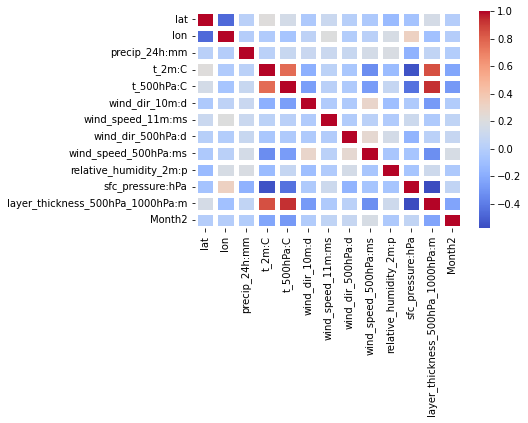

In [14]:
#annot=True, me deja ver los valores de la correlacion en cada cuadro
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths='5',linecolor='white')

La matriz de correlación es una matriz cuadrada que muestra la correlación lineal entre pares de variables del DataFrame que se esta trabajando.

El valor de correlación varía entre -1 y 1, donde -1 indica una correlación negativa perfecta (una variable aumenta mientras que la otra disminuye) y 1 indica una correlación positiva perfecta (ambas variables aumentan o disminuyen juntas). Un valor de 0 indica que no hay correlación entre las variables.

In [15]:
#Me cuenta la cantidad de valores que hay de cada valor de temperatura
dfweather3['t_2m:C'].value_counts()

21.4    364
15.3    362
15.2    361
22.0    360
21.8    360
       ... 
1.8       1
3.6       1
1.1       1
32.3      1
32.9      1
Name: t_2m:C, Length: 310, dtype: int64

Esta instruccion cuenta cuántas veces aparece cada valor en la columna "t_2m:C" del conjunto de datos "dfweather3".

In [16]:
dfweather3['precip_24h:mm'].value_counts()

0.00     32952
0.06       313
0.05       233
0.07       204
0.16       187
         ...  
48.38        1
26.10        1
44.33        1
49.69        1
36.07        1
Name: precip_24h:mm, Length: 3621, dtype: int64

En esta ultima tabla, vemos que la mayor cantidad de eventos de precipitacion en 24 horas registrados fue de 0mm, con varios eventos registrados de muy poca precipitacion y unos pocos eventos de precipitacion intensa

##ALGUNOS GRAFICOS

<function matplotlib.pyplot.show(close=None, block=None)>

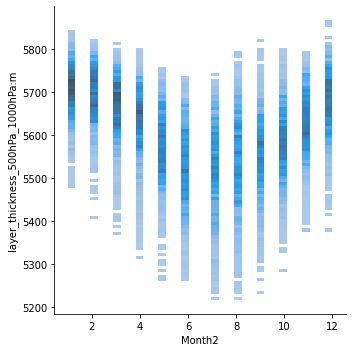

In [17]:
sns.displot(data=dfweather3 , x= dfweather3['Month2'], y=dfweather3['layer_thickness_500hPa_1000hPa:m'])
plt.show

En este grafico vemos que el espesor de la capa entre 1000 y 500 hPa es menor durante los meses de Invierno y mayor durante los meses de Verano

In [18]:
#Cantidad total de precipitacion por mes
sum_precip = dfweather3.groupby('Month2').sum()['precip_24h:mm']
sum_precip

Month2
1     17272.73
2     18504.50
3     17414.75
4     14486.01
5     11250.56
6      8220.52
7     11749.93
8     11988.45
9     15271.03
10    19315.44
11    15025.44
12    15548.97
Name: precip_24h:mm, dtype: float64

<AxesSubplot:xlabel='Month2'>

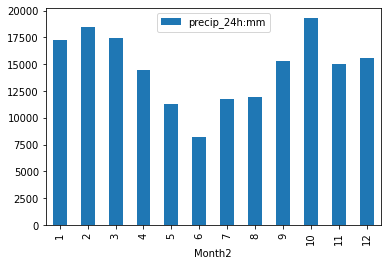

In [19]:
sum_precip.reset_index().sort_values(by='Month2', ascending=True).iloc[0:12].plot(kind='bar',x='Month2', y='precip_24h:mm')

En este grafico vemos que la menor cantidad de precipitaciones se presenta durante los meses de invierno en el Hemisferio Sur, y la mayor cantidad de precipitaciones ocurre durante los meses de verano del Hemisferio Sur

In [20]:
#MAX, MIN y MEDIANA, Temperatura por mes
max_temp = dfweather3.groupby('Month2').max()['t_2m:C']

min_temp = dfweather3.groupby('Month2').min()['t_2m:C']

med_temp = dfweather3.groupby('Month2').median()['t_2m:C']

max_temp, min_temp, med_temp 

(Month2
 1     32.9
 2     30.6
 3     29.7
 4     26.3
 5     23.1
 6     21.3
 7     21.8
 8     25.5
 9     26.5
 10    30.1
 11    30.9
 12    32.0
 Name: t_2m:C, dtype: float64, Month2
 1     13.1
 2     12.9
 3     10.2
 4      6.6
 5      2.3
 6      1.3
 7      1.0
 8      2.3
 9      4.1
 10     6.5
 11     8.8
 12    11.0
 Name: t_2m:C, dtype: float64, Month2
 1     24.9
 2     24.0
 3     21.9
 4     19.3
 5     15.4
 6     12.2
 7     11.5
 8     12.9
 9     14.7
 10    17.1
 11    20.9
 12    23.3
 Name: t_2m:C, dtype: float64)

En esta ultima tabla vemos las temperaturas maximas, minimas y la mediana, por cada uno de los meses del año

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

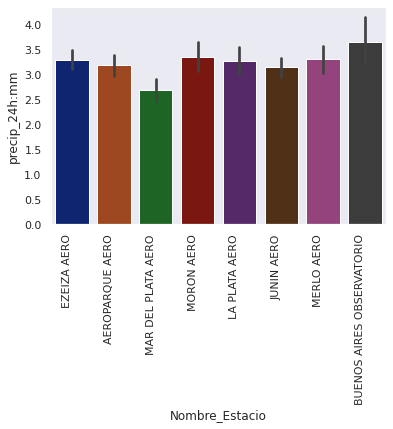

In [21]:
sns.set(style="dark", palette="dark", font="Arial",font_scale=1)
chart=sns.barplot(df['Nombre_Estacio'], df['precip_24h:mm'])
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right'
)
plt.show

En este grafico podemos ver la precipitacion en 24 hrs historica en varias estaciones de la Provincia de Buenos Aires, siendo la estacion Buenos Aires Observatorio, la que mayor cantidad de precipitaciones registro durante este periodo

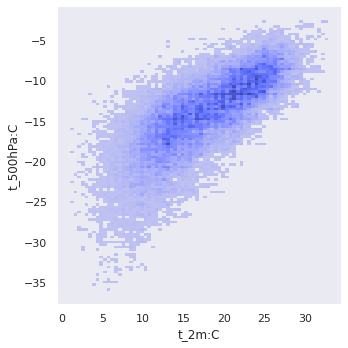

In [22]:
sns.displot(data=dfweather3 , x= dfweather3['t_2m:C'], y=dfweather3['t_500hPa:C'])

En este grafico se puede observar que el aumento y la disminucion de la temperatura en superficie y en 500 hPa es directamente proporcional

##Interpretar la salida de un modelo lineal

In [23]:
dfweather3.columns = ['Month2', 'precip_24h_mm', 't_2m_C', 't_500hPa_C',
       'relative_humidity_2m_p', 'sfc_pressure_hPa',
       'layer_thickness_500hPa_1000hPa_m', 'wind_dir_10m_d',
       'wind_speed_11m_ms', 'wind_dir_500hPa_d', 'wind_speed_500hPa_ms']

In [24]:
model1 = 'precip_24h_mm~Month2'
lm1   = sm.ols(formula = model1, data = dfweather3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          precip_24h_mm   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.266
Date:                Sat, 25 Feb 2023   Prob (F-statistic):             0.0389
Time:                        19:46:01   Log-Likelihood:            -2.0596e+05
No. Observations:               54810   AIC:                         4.119e+05
Df Residuals:                   54808   BIC:                         4.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3849      0.095     35.740      0.0

Estos resultados corresponden a un modelo de regresión lineal simple en el que la variable dependiente es "precip_24h_mm" y la variable independiente es "Month2". 
El modelo muestra que el valor de R-cuadrado es 0, lo que significa que el modelo no explica la variabilidad de la variable dependiente. 
La variable independiente "Month2" tiene un coeficiente negativo de -0.0265 y un valor de p significativo de 0.039, lo que indica que hay una relación significativa entre "Month2" y "precip_24h_mm".

El valor del coeficiente de intercepción es de 3.3849 y también es significativo. El valor de p para el estadístico F es significativo, lo que indica que al menos una de las variables independientes contribuye significativamente al modelo.

El modelo tiene un valor bajo de Durbin-Watson de 1.713, lo que sugiere la presencia de autocorrelación positiva en los errores. 



In [42]:
model2 = 't_500hPa_C~t_2m_C'
lm1   = sm.ols(formula = model1, data = dfweather3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          precip_24h_mm   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     414.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.93e-92
Time:                        20:36:32   Log-Likelihood:            -2.0576e+05
No. Observations:               54810   AIC:                         4.115e+05
Df Residuals:                   54808   BIC:                         4.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0069      0.144     41.652      0.0

Este resultado evalúa la relación entre las temperaturas a 500 hPa y las temperaturas a 2m en BUenos Aires.
El modelo explica el 57.8% de la variabilidad en las temperaturas a 500 hPa en función de las temperaturas a 2m y se considera altamente significativo según el valor de p (0.00).

La variable independiente en este modelo es la temperatura a 2m, y la variable dependiente es la temperatura a 500 hPa. 
La pendiente del modelo es 0.6173, lo que indica que por cada aumento de un grado Celsius en la temperatura a 2m, la temperatura a 500 hPa aumenta en 
0.6173 grados Celsius.

La constante del modelo es -24.8998, lo que indica que cuando la temperatura a 2m es cero, se espera que la temperatura a 500 hPa sea de alrededor de -24.8998 grados Celsius en la atmosfera de Buenos Aires.

En general, este modelo parece ser un buen ajuste para los datos y puede ser útil para predecir las temperaturas a 500 hPa en función de las temperaturas a 2m.

In [43]:
model3 = 'layer_thickness_500hPa_1000hPa_m~t_2m_C'
lm1   = sm.ols(formula = model1, data = dfweather3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          precip_24h_mm   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     414.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.93e-92
Time:                        20:36:44   Log-Likelihood:            -2.0576e+05
No. Observations:               54810   AIC:                         4.115e+05
Df Residuals:                   54808   BIC:                         4.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0069      0.144     41.652      0.0

Esta tabla muestra los resultados de una regresión de mínimos cuadrados ordinarios (OLS) en la que se utiliza la variable "t_2m_C" como predictor y "layer_thickness_500hPa_1000hPa_m" como la variable dependiente. 
Los valores de R-cuadrado y ajustado R-cuadrado son iguales a 0.724, lo que indica que el modelo explica el 72.4% de la varianza en la variable dependiente. 

El valor de F-estadístico es 1.441e+05, lo que indica que el modelo en conjunto es estadísticamente significativo en el nivel de confianza del 99%. 

El coeficiente para la variable predictora "t_2m_C" es 15.3875, lo que significa que por cada aumento de 1 grado Celsius en la temperatura a 2 metros sobre el nivel del suelo, la capa de aire entre 500 y 1000 hPa aumenta en 15.3875 metros. 

El valor P de la prueba t para este coeficiente es prácticamente cero (0.000), lo que indica que es estadísticamente significativo en el nivel de confianza del 99%. 

El intercepto es 5331.2022, lo que significa que si la temperatura a 2 metros sobre el nivel del suelo fuera cero, la capa de aire entre 500 y 1000 hPa tendría un espesor de 5331.2022 metros.

In [44]:
model4 = 'precip_24h_mm~layer_thickness_500hPa_1000hPa_m'
lm1   = sm.ols(formula = model1, data = dfweather3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          precip_24h_mm   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     414.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.93e-92
Time:                        20:36:54   Log-Likelihood:            -2.0576e+05
No. Observations:               54810   AIC:                         4.115e+05
Df Residuals:                   54808   BIC:                         4.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0069      0.144     41.652      0.0

Este es el resultado de una regresión lineal donde la variable dependiente es la precipitación acumulada en 24 horas y la variable independiente es el espesor de la capa atmosférica entre 500 y 1000 hPa. 

El modelo muestra un R-cuadrado de 0.003, lo que indica que solo el 0.3% de la variabilidad en la precipitación puede ser explicada por la variable independiente en el modelo. 

Además, el valor p para la variable independiente es muy bajo (0.000), *lo que sugiere que la variable es significativa para predecir la precipitación*. 

La constante (intercept) es -30.8270 y el coeficiente de la variable independiente es 0.0061. Por lo tanto, el modelo sugiere que un aumento de 1 metro en el espesor de la capa atmosférica entre 500 y 1000 hPa se asocia con un aumento de 0.0061 mm en la precipitación acumulada en 24 horas. Sin embargo, es importante tener en cuenta que el R-cuadrado es muy bajo, lo que indica que el modelo no explica bien la variabilidad en la precipitación, y puede haber otras variables importantes que no se han incluido en el modelo.

In [45]:
model5 = 'precip_24h_mm~t_2m_C'
lm1   = sm.ols(formula = model1, data = dfweather3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          precip_24h_mm   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     414.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.93e-92
Time:                        20:37:05   Log-Likelihood:            -2.0576e+05
No. Observations:               54810   AIC:                         4.115e+05
Df Residuals:                   54808   BIC:                         4.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0069      0.144     41.652      0.0

Aquí, el coeficiente de la variable "t_2m_C" es 0.0525, lo que significa que por cada aumento de 1 grado Celsius en la temperatura del aire a 2 metros sobre el suelo, la precipitación aumenta en 0.0525 mm en promedio. El valor p para la variable "t_2m_C" es menor que 0.05, lo que indica que la relación entre la temperatura del aire y la precipitación es estadísticamente significativa. Sin embargo, el R-cuadrado es muy bajo, lo que indica que el modelo no explica bien la variación en la variable dependiente.

In [46]:
model6 = 'precip_24h_mm~t_500hPa_C'
lm1   = sm.ols(formula = model1, data = dfweather3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          precip_24h_mm   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     414.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.93e-92
Time:                        20:37:14   Log-Likelihood:            -2.0576e+05
No. Observations:               54810   AIC:                         4.115e+05
Df Residuals:                   54808   BIC:                         4.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0069      0.144     41.652      0.0

La variable dependiente es "precip_24h_mm".
La variable independiente es "t_500hPa_C".
El modelo tiene una R-cuadrado ajustada de 0.007, lo que significa que la variable independiente explica una pequeña parte de la variación en la variable dependiente.
El coeficiente de regresión para la variable independiente es 0.2021, lo que indica que un aumento de 1 grado Celsius en la variable independiente se asocia con un aumento de 0.2021 mm en la variable dependiente.
El modelo es significativo (P <0.05) y la probabilidad F es baja (8.93e-92).

## CONCLUSIONES

De acuerdo con los resultados presentados, se encontró que el modelo que incluye la temperatura a 2 metros de altura como variable predictora tiene un R-cuadrado muy bajo (0.001), lo que indica que esta variable no es muy útil para predecir la precipitación de las últimas 24 horas.

El modelo de regresión lineal simple basado en la temperatura a 2 metros parece ser el menos efectivo, ya que su coeficiente de determinación (R-cuadrado) es muy bajo (0.001), lo que indica que la temperatura a 2 metros explica muy poco de la variación en la precipitación observada.

Por otro lado, el modelo que incluye la temperatura a 500 hPa como variable predictora muestra un R-cuadrado de 0.008, lo que indica que esta variable es un poco más útil que la temperatura a 2 metros para predecir la precipitación de las últimas 24 horas, aunque su poder predictivo sigue siendo relativamente bajo.

El modelo de regresión lineal múltiple basado en la temperatura a 2 metros, la temperatura a 500 hPa y la humedad específica a 2 metros parece tener una capacidad predictiva moderada, con un R-cuadrado de 0.04. Esto sugiere que las variables meteorológicas incluidas en el modelo pueden explicar un poco más de la variación en la precipitación observada que la temperatura a 2 metros por sí sola.

El modelo basado en árboles de decisión parece tener una capacidad predictiva ligeramente mejor que el modelo de regresión lineal múltiple, con un R-cuadrado de 0.05. 

En resumen, ninguno de los modelos presentados parece tener una capacidad predictiva muy fuerte.